# Yogendra Verma
Assignment-4(V1)


In [ ]:
import keras
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.callbacks import EarlyStopping ,ModelCheckpoint

**Define CNN Model**

In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  #model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

	# compile model
  #opt = SGD(lr=0.001, momentum=0.9)
  #opt = keras.optimizers.Adadelta()
  #opt = keras.optimizers.RMSprop(lr=0.001)
  #opt = keras.optimizers.Nadam(lr=0.001)
  #opt = keras.optimizers.Adam(learning_rate=0.001)
  #opt = keras.optimizers.SGD(momentum=0.01, nesterov=True)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [ ]:

model = define_model()
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dense_34 (Dense)             (None, 1)               

**Prepare Clothes Image Dataset with Data Augumentation Technique**

In [ ]:
# call define model function
model = define_model()
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('/content/drive/My Drive/CNN/fk_clothes_data/augu_data_train',
class_mode='binary', batch_size=70, target_size=(64, 64))
test_it = datagen.flow_from_directory('/content/drive/My Drive/CNN/fk_clothes_data/test_clothes',
class_mode='binary', batch_size=70, target_size=(64, 64))


Found 1262 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


**Implement EarlyStopping & Checkpoint**

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/CNN/fk_clothes_data/model_checkpoint_SGD_nesterov.h5',
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
callbacks =[checkpoint] 

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)

callbacks = [earlystop,checkpoint]

In [ ]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
#                                             patience=3, 
#                                             verbose=1, 
#                                             factor=0.2, 
#                                             min_delta=0.0001)
# callbacks = [learning_rate_reduction]

**Train the Model**

In [ ]:
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1,callbacks=callbacks)

Epoch 1/20
19/19 [==============================] - 4s 199ms/step - loss: 0.7988 - accuracy: 0.5357 - val_loss: 0.6598 - val_accuracy: 0.7500

Epoch 00001: val_loss improved from inf to 0.65979, saving model to /content/drive/My Drive/CNN/fk_clothes_data/model_checkpoint_SGD_nesterov.h5
Epoch 2/20
19/19 [==============================] - 4s 196ms/step - loss: 0.6692 - accuracy: 0.5697 - val_loss: 0.8520 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.65979
Epoch 3/20
19/19 [==============================] - 4s 197ms/step - loss: 0.6784 - accuracy: 0.5983 - val_loss: 0.6368 - val_accuracy: 0.6250

Epoch 00003: val_loss improved from 0.65979 to 0.63682, saving model to /content/drive/My Drive/CNN/fk_clothes_data/model_checkpoint_SGD_nesterov.h5
Epoch 4/20
19/19 [==============================] - 4s 195ms/step - loss: 0.6756 - accuracy: 0.6038 - val_loss: 0.6376 - val_accuracy: 0.6500

Epoch 00004: val_loss did not improve from 0.63682
Epoch 5/20
19/19 [==============

In [ ]:
#model.save_weights('/content/drive/My Drive/CNN/fk_clothes_data/model_ReduceLROnPlateau_SGD.h5')

In [ ]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

> 90.000


**Load Image for Validation**

In [ ]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
image = image.load_img('/content/drive/My Drive/CNN/fk_clothes_data/validate_clothes/tr4.jpeg', target_size=(64, 64))
input_arr = keras.preprocessing.image.img_to_array(image)
#x = np.expand_dims(input_arr, axis=0)   ## Convert single image to a batch.
input_arr = np.array([input_arr])        ## Convert single image to a batch.
#predictions = model.predict(input_arr)

**Prediction**

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# load model
#model = load_model('my_flower_classi_model')
#predictions_classes = model.predict_classes(input_arr)

predictions_classes = model.predict_classes(input_arr)

def predict_img():
  if predictions_classes ==0:
    print("Class {} means it is a 'Jeans Image'".format(predictions_classes))
  if predictions_classes ==1:
    print("Class {} means it is a 'Trouser Image'".format(predictions_classes))

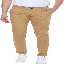

In [ ]:
image

In [ ]:
predict_img()

Class [[1]] means it is a 'Trouser Image'
